# Assignment 11
Analyzing Air Quality Index (AQI) Trends in a City

In [8]:
! pip install pandas numpy matplotlib scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline

In [10]:
aqi = pd.read_csv("aqi-data.csv",encoding='latin1')
print(aqi.index)


RangeIndex(start=0, stop=49005, step=1)


In [11]:
sns.set(style="ticks", rc = {'figure.figsize':(20,15)})
# Supressing update warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# checking the original dataset
print(aqi.isnull().sum())
print(aqi.shape)
aqi.info()

stn_code                       15764
sampling_date                      0
state                              0
location                           0
agency                         16355
type                             994
so2                             1313
no2                              858
rspm                            2696
spm                            28659
location_monitoring_station     2537
pm2_5                          49005
date                               0
dtype: int64
(49005, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49005 entries, 0 to 49004
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     33241 non-null  float64
 1   sampling_date                49005 non-null  object 
 2   state                        49005 non-null  object 
 3   location                     49005 non-null  object 
 4   agency                       326

In [13]:
# Cleaning up the data
# cleaning up name changes
data.state = data.state.replace({'Uttaranchal':'Uttarakhand'})
data.state[data.location == "Jamshedpur"] = data.state[data.location ==
'Jamshedpur'].replace({"Bihar":"Jharkhand"})
#changing types to uniform format
types = {
"Residential": "R",
"Residential and others": "RO",
"Residential, Rural and other Areas": "RRO",
"Industrial Area": "I",
"Industrial Areas": "I",
"Industrial": "I",
"Sensitive Area": "S",
"Sensitive Areas": "S",
"Sensitive": "S",
np.nan: "RRO"
}
data.type = data.type.replace(types)

In [14]:
aqi.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [21]:
# defining columns of importance, which shall be used reguarly
VALUE_COLS = ['stn_code', 'so2', 'no2', 'rspm', 'spm' ]

In [22]:
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
aqi[VALUE_COLS] = imputer.fit_transform(aqi[VALUE_COLS])

In [23]:
# checking to see if the dataset has any null values left over and the forma
print(aqi.isnull().sum())
aqi.tail()

stn_code                           0
sampling_date                      0
state                              0
location                           0
agency                         16355
type                             994
so2                                0
no2                                0
rspm                               0
spm                                0
location_monitoring_station     2537
pm2_5                          49005
date                               0
dtype: int64


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
49000,472.235282,23-03-05,Chandigarh,Chandigarh,NaN,Residential and others,6.000000,15.0,47.0,125.0,Punjab Eng College,NaN,2005-03-23
49001,472.235282,25-03-05,Chandigarh,Chandigarh,NaN,Residential and others,7.584295,12.0,54.0,161.0,Punjab Eng College,NaN,2005-03-25
49002,472.235282,28-03-05,Chandigarh,Chandigarh,NaN,Residential and others,7.584295,10.0,116.0,196.0,Punjab Eng College,NaN,2005-03-28
49003,472.235282,30-03-05,Chandigarh,Chandigarh,NaN,Residential and others,7.584295,9.0,38.0,154.0,Punjab Eng College,NaN,2005-03-30
49004,472.235282,30-03-05,Chandigarh,Chandigarh,NaN,Residential and others,7.584295,9.0,38.0,154.0,Punjab Eng College,NaN,2005-03-30


In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the data is stored in a DataFrame named `aqi`
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm']

def plot_for_state(aqi, state):
    # Filter data for the given state
    state_data = aqi[aqi['state'] == state]
    
    # Convert 'sampling_date' to datetime, coercing invalid entries into NaT
    state_data['date'] = pd.to_datetime(state_data['sampling_date'], errors='coerce')

    # Drop rows with invalid dates (NaT)
    state_data = state_data.dropna(subset=['date'])
    
    # Set the 'date' column as index for resampling
    state_data.set_index('date', inplace=True)

    # Resample the data by year and take the mean for each pollutant
    state_data_yearly = state_data[VALUE_COLS].resample('Y').mean()

    # Create subplots
    fig, ax = plt.subplots(2, 2, figsize=(20, 12))
    fig.suptitle(f"Yearly Average Air Quality Levels for {state}", size=20)
    
    # Plot each pollutant
    state_data_yearly['so2'].plot(legend=True, ax=ax[0][0], title="SO2")
    ax[0][0].set_ylabel("SO2 (μg/m³)")
    ax[0][0].set_xlabel("Year")

    state_data_yearly['no2'].plot(legend=True, ax=ax[0][1], title="NO2")
    ax[0][1].set_ylabel("NO2 (μg/m³)")
    ax[0][1].set_xlabel("Year")

    state_data_yearly['rspm'].plot(legend=True, ax=ax[1][0], title="RSPM")
    ax[1][0].set_ylabel("RSPM (PM10 μg/m³)")
    ax[1][0].set_xlabel("Year")

    state_data_yearly['spm'].plot(legend=True, ax=ax[1][1], title="SPM")
    ax[1][1].set_ylabel("SPM (μg/m³)")
    ax[1][1].set_xlabel("Year")

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust title to fit
    plt.show()

# Example usage:


      sampling_date
0               NaT
1               NaT
2               NaT
3               NaT
4               NaT
...             ...
48412           NaT
48413           NaT
48414           NaT
48415           NaT
48416           NaT

[2418 rows x 1 columns]


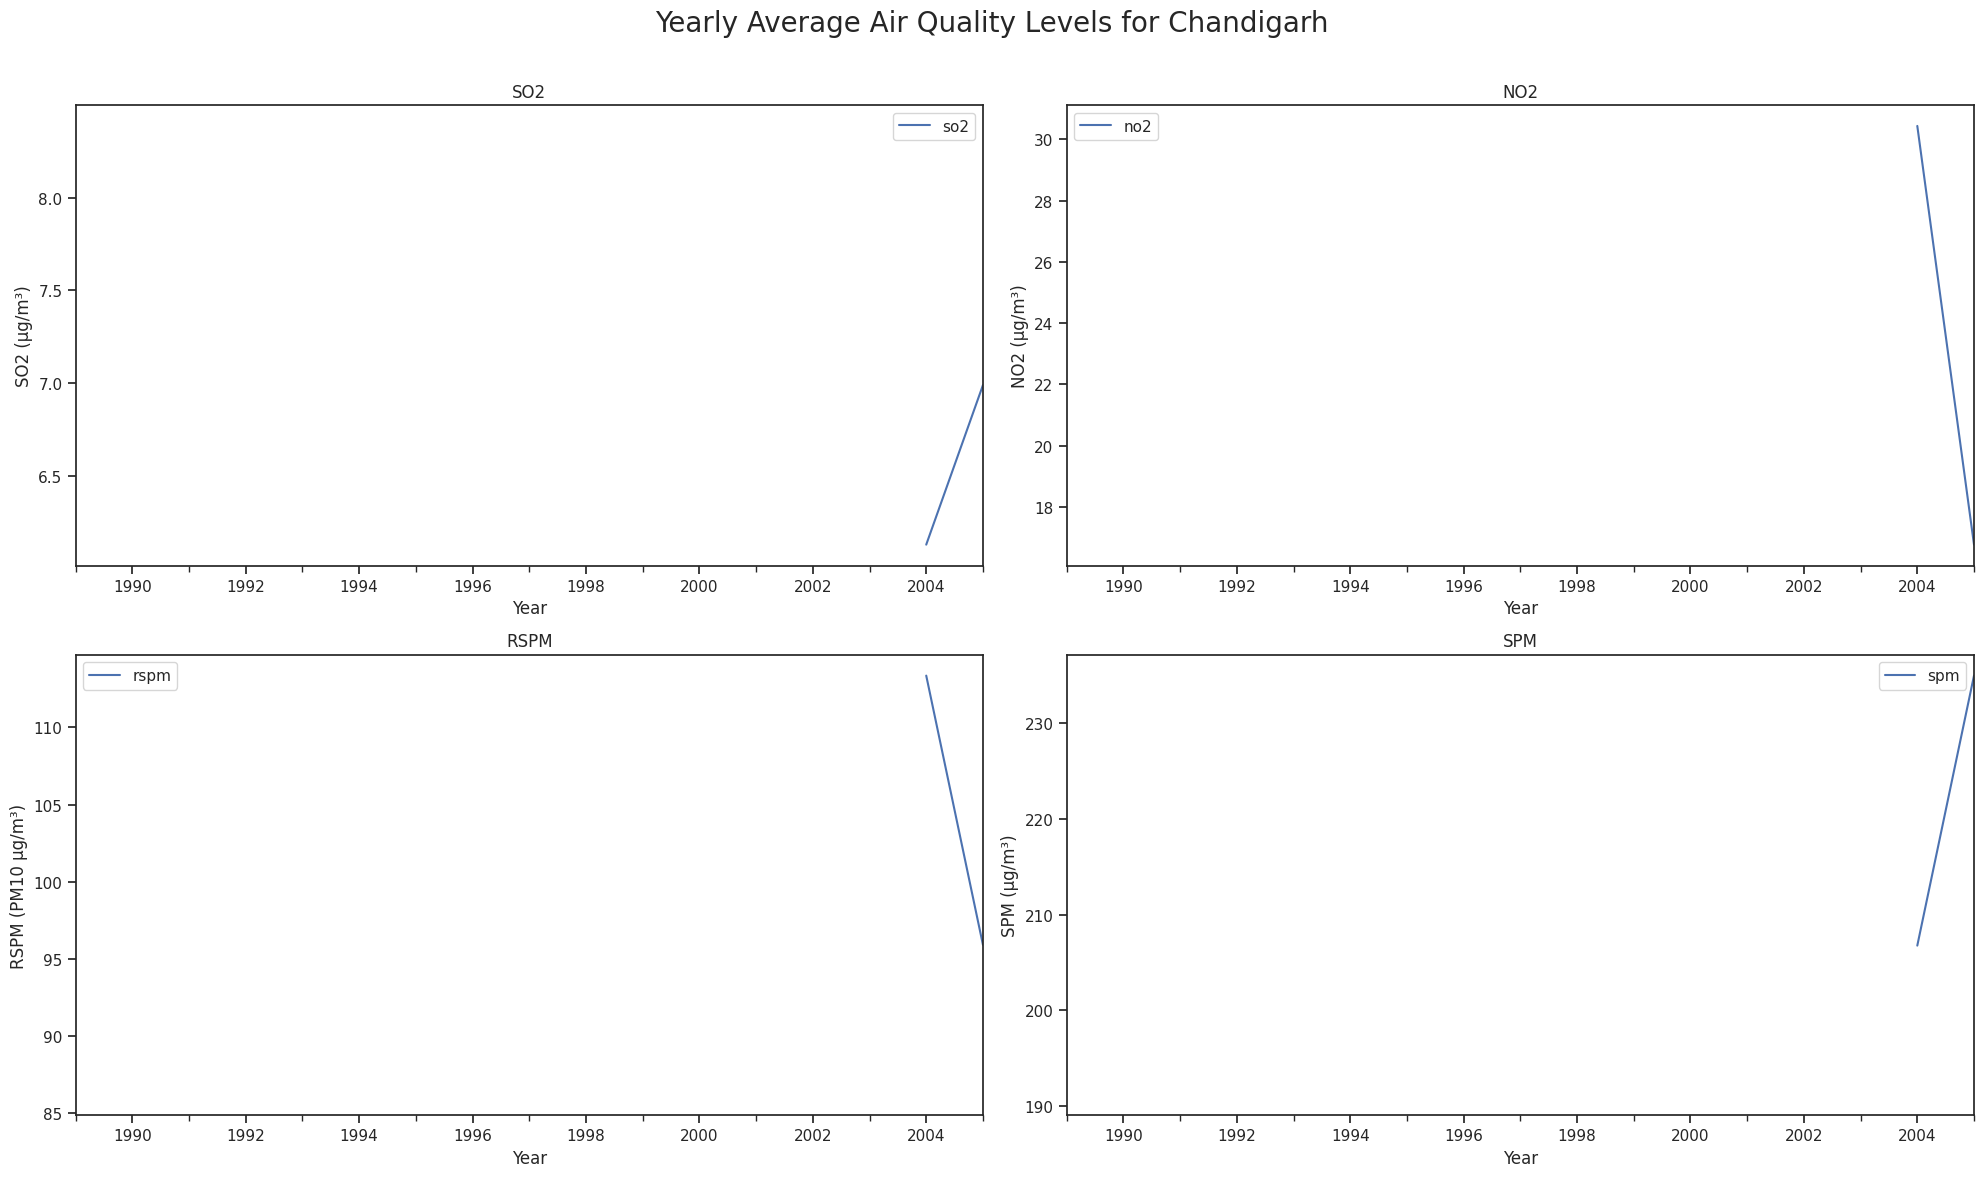

In [45]:
# Let's print rows where the `sampling_date` column has malformed entries
invalid_dates = aqi[~pd.to_datetime(aqi['sampling_date'], errors='coerce').notna()]
print(invalid_dates[['sampling_date']])

# Drop rows where `sampling_date` couldn't be parsed
aqi_cleaned = aqi.dropna(subset=['sampling_date'])

# Alternatively, if you want to replace invalid dates with a default value (e.g., NaT or a placeholder date):
aqi['sampling_date'] = pd.to_datetime(aqi['sampling_date'], errors='coerce')

# Convert 'sampling_date' to datetime
aqi_cleaned['date'] = pd.to_datetime(aqi_cleaned['sampling_date'], errors='coerce')

# Set the 'date' column as the index for resampling
aqi_cleaned.set_index('date', inplace=True)

plot_for_state(aqi_cleaned, 'Chandigarh')



In [55]:
def indicator_by_state_and_year(indicator="so2"):
    plt.figure(figsize=(20, 20))
    hmap = sns.heatmap(data=data.pivot_table(values=indicator, index='state', aggfunc='median', margins=True),annot=True, linewidths=.5, cbar=True, square=True,cmap='inferno', cbar_kws={'label': "Annual Average"})
    hmap.set_title("{} by state and year".format(indicator))

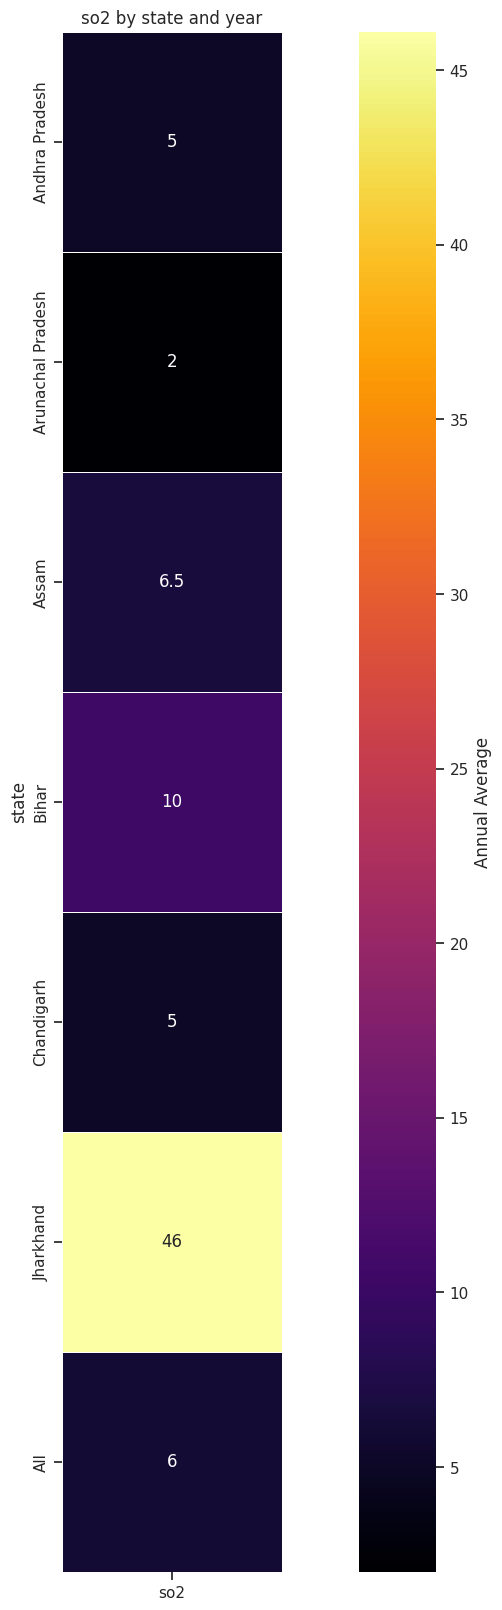

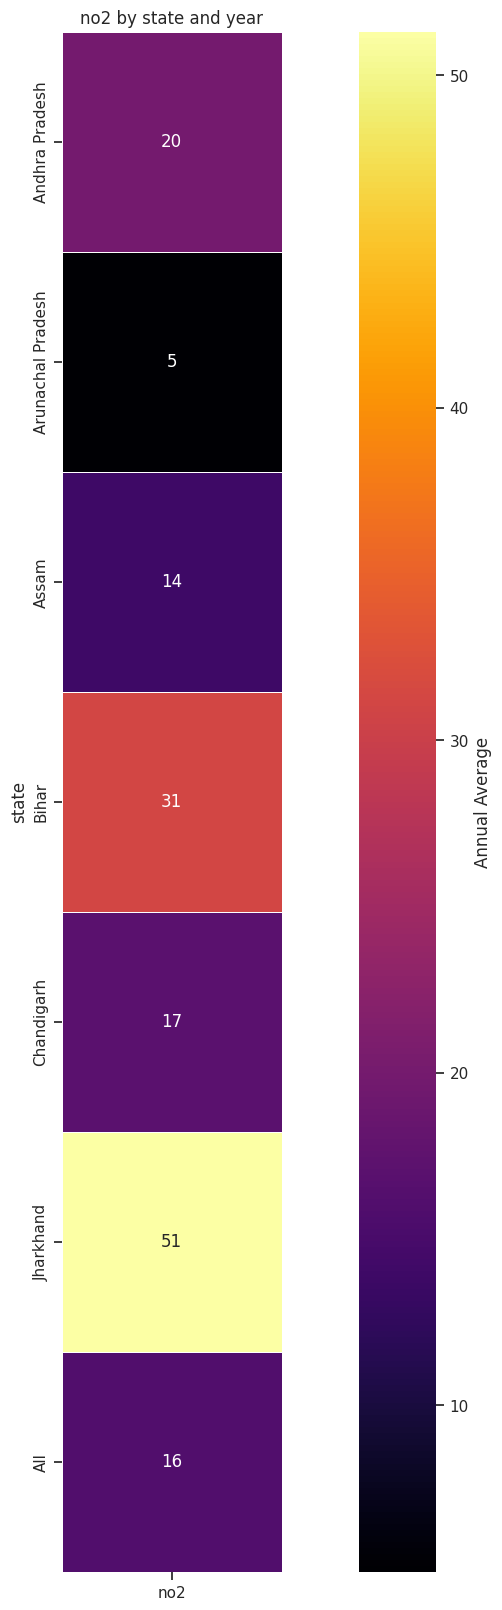

In [56]:
indicator_by_state_and_year("so2")
indicator_by_state_and_year("no2")

In [51]:
def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2,1, figsize=(20, 12))
    ind = data[[indicator, 'state']].groupby('state',
    as_index=False).median().sort_values(by=indicator,ascending=False)
    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='red')
    top10.set_title("Top 10 states by {} (1991-2016)".format(indicator))
    top10.set_ylabel("so2 (μg/m3)")
    top10.set_xlabel("State")
    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:],ax=ax[1], color='green')
    bottom10.set_title("Bottom 10 states by {} (1991-2016)".format(indicator))
    bottom10.set_ylabel("so2 (μg/m3)")
    bottom10.set_xlabel("State")

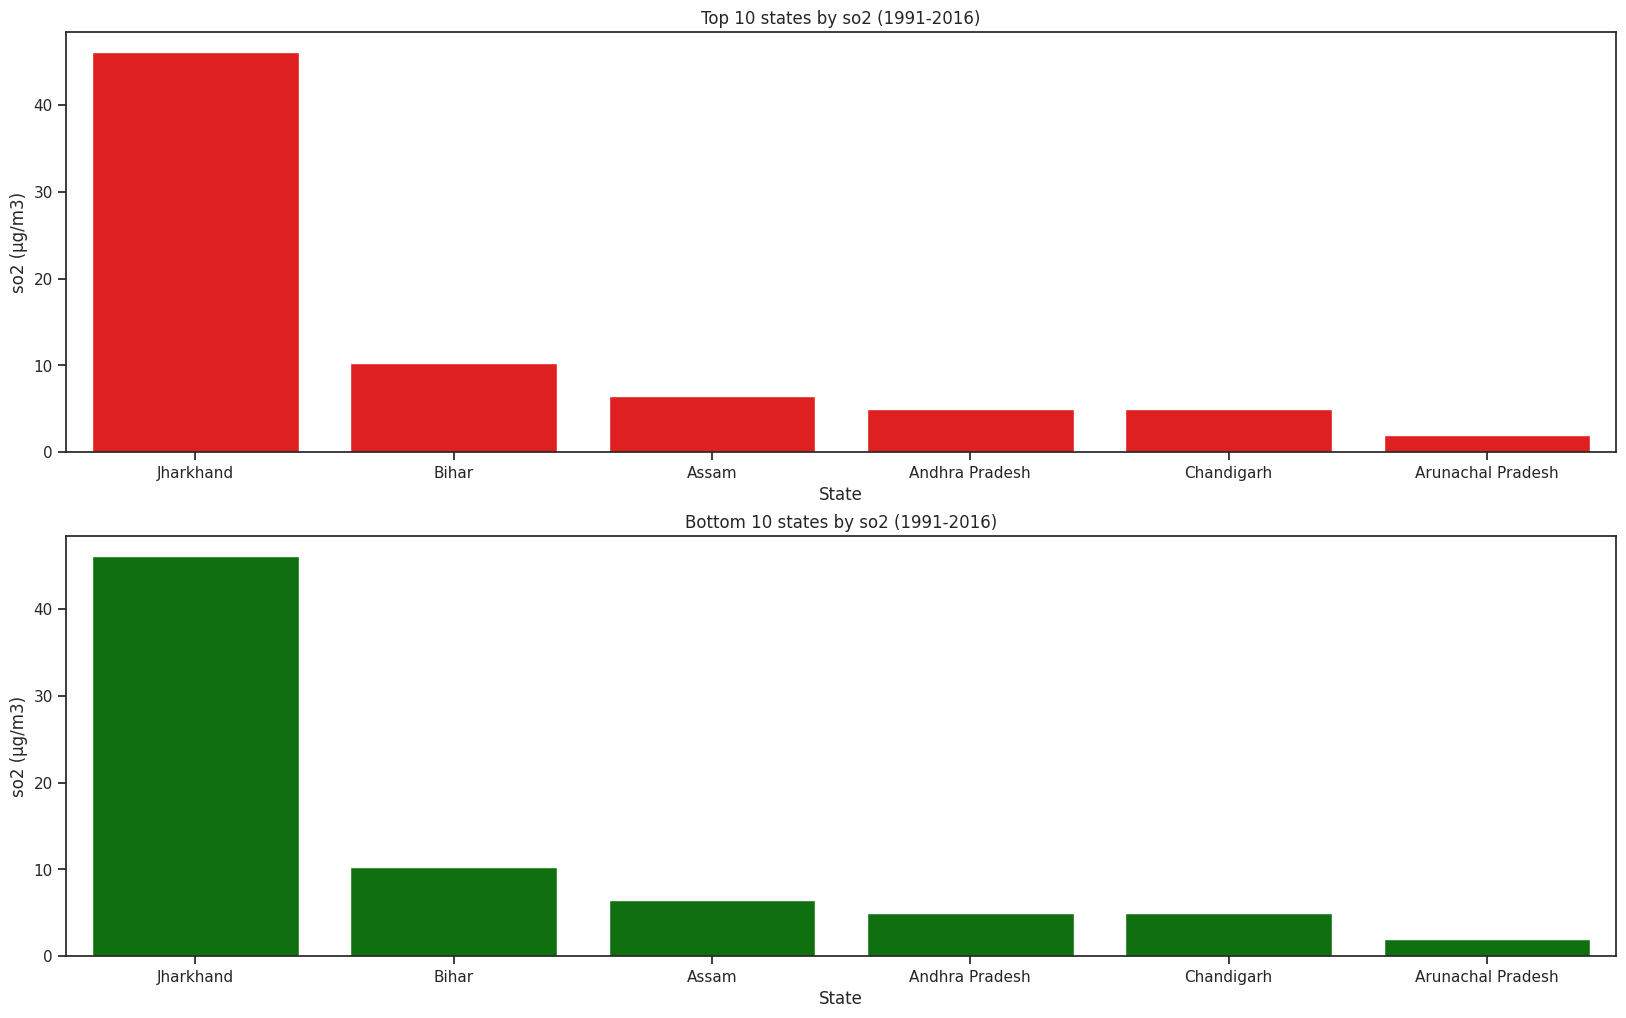

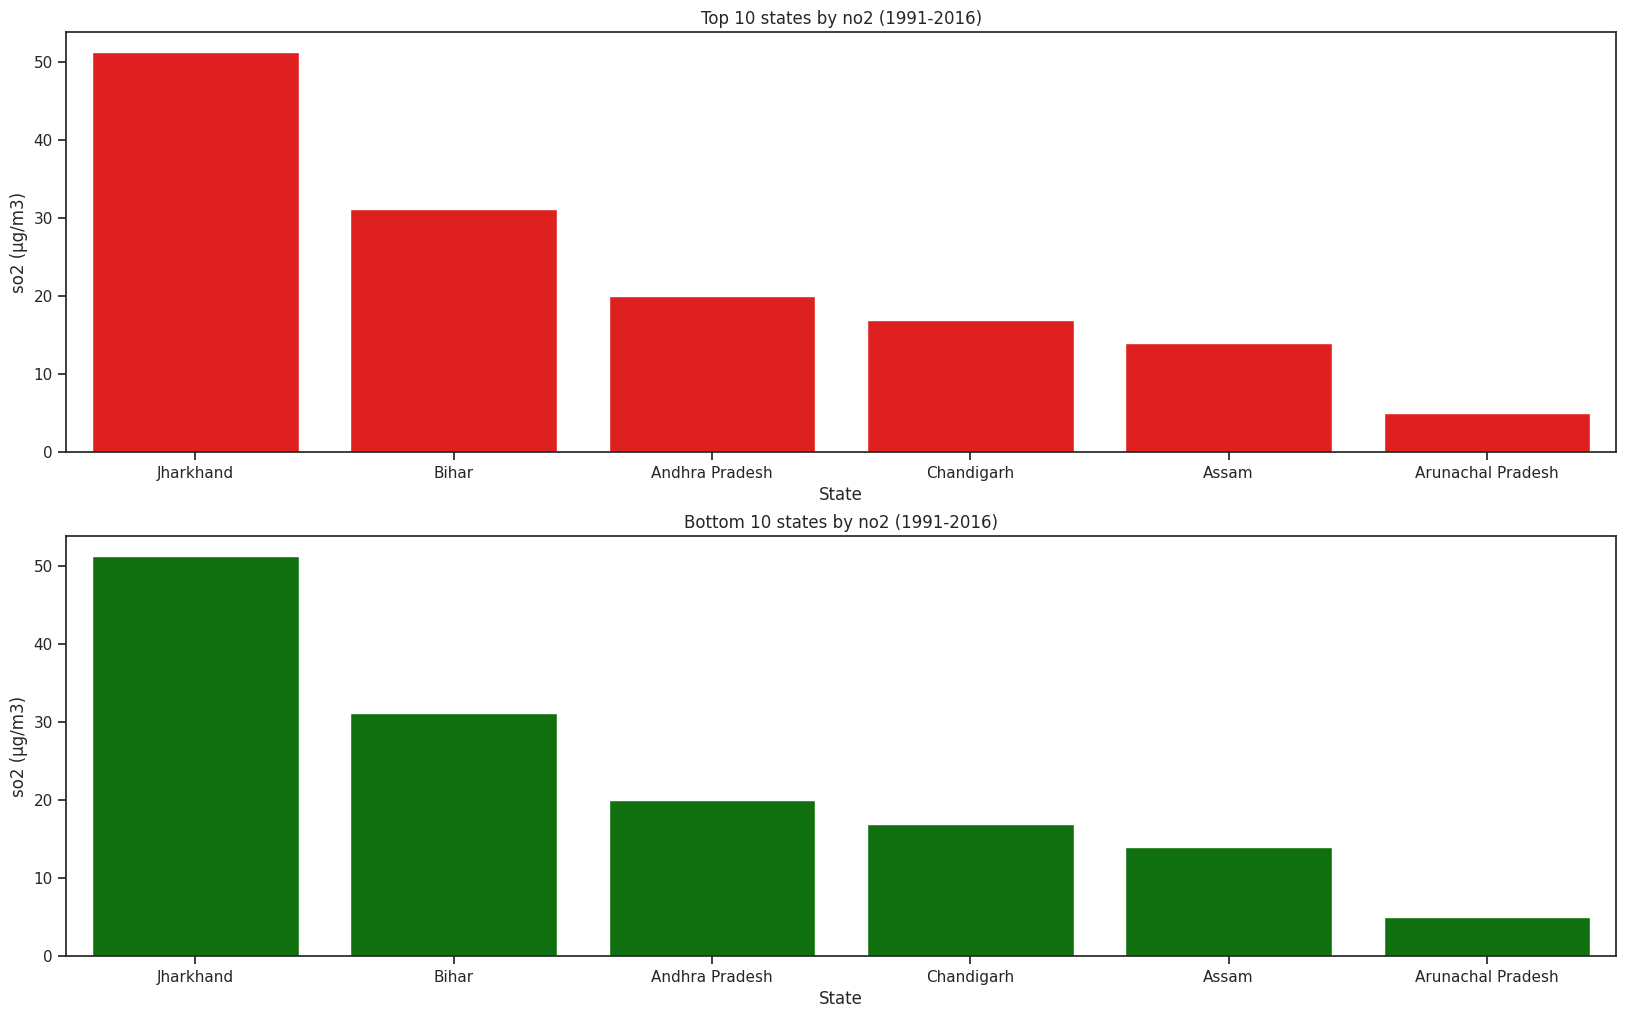

In [52]:
top_and_bottom_10_states("so2")
top_and_bottom_10_states("no2")

KeyError: 'year'

<Figure size 2000x2000 with 0 Axes>